<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/08_recurrent_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Example

In [241]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf

from pprint import pprint
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [242]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [243]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [244]:
a = a.reshape((len(a), -1))

In [245]:
a.shape

(100, 1)

In [246]:
a[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [247]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [248]:
TimeseriesGenerator?

In [249]:
data = np.array([[i] for i in range(16)])
targets = np.array([[i] for i in range(16)])

In [250]:
data_gen = TimeseriesGenerator(data, targets,
                               length = 10, sampling_rate=2,
                               batch_size=2)
pprint(list(data_gen))

[(array([[[0],
        [2],
        [4],
        [6],
        [8]],

       [[1],
        [3],
        [5],
        [7],
        [9]]]),
  array([[10],
       [11]])),
 (array([[[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]],

       [[ 3],
        [ 5],
        [ 7],
        [ 9],
        [11]]]),
  array([[12],
       [13]])),
 (array([[[ 4],
        [ 6],
        [ 8],
        [10],
        [12]],

       [[ 5],
        [ 7],
        [ 9],
        [11],
        [13]]]),
  array([[14],
       [15]]))]


In [251]:
data_gen = TimeseriesGenerator(data, targets,
                               length = 10, sampling_rate=3,
                               batch_size=2)
pprint(list(data_gen))

[(array([[[ 0],
        [ 3],
        [ 6],
        [ 9]],

       [[ 1],
        [ 4],
        [ 7],
        [10]]]),
  array([[10],
       [11]])),
 (array([[[ 2],
        [ 5],
        [ 8],
        [11]],

       [[ 3],
        [ 6],
        [ 9],
        [12]]]),
  array([[12],
       [13]])),
 (array([[[ 4],
        [ 7],
        [10],
        [13]],

       [[ 5],
        [ 8],
        [11],
        [14]]]),
  array([[14],
       [15]]))]


In [252]:
lags = 3

In [253]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [254]:
pprint(list(g)[0])

(array([[[0],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [6]]]),
 array([[3],
       [4],
       [5],
       [6],
       [7]]))


In [255]:
(list(g)[0][0]).shape # A 3D tensor, with shape [samples in each batch, timesteps, features]

(5, 3, 1)

In [256]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

In [257]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu',
                    input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adagrad', loss='mse',
              metrics=['mae'])

In [258]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 100)               10200     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [259]:
# Dimension
# 1 of (3,1)
# (1+1)*100 + 100*100 = 10200
# (100+1)*1 = 101

In [260]:
%%time
h = model.fit(g, epochs=1000, steps_per_epoch=5,
            verbose=False)

CPU times: user 33.5 s, sys: 1.23 s, total: 34.7 s
Wall time: 47.5 s


In [261]:
# we only put g into the formula

In [262]:
res = pd.DataFrame(h.history)

In [263]:
res.tail(3)

,loss,mae
997,1.1594,0.9786
998,1.3274,1.0003
999,0.3083,0.5220


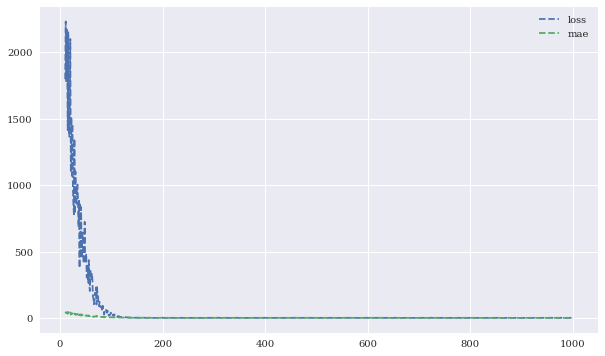

In [264]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [265]:
x = np.array([21, 22, 23]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

23

In [266]:
x = np.array([87, 88, 89]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

91

In [267]:
x = np.array([187, 188, 189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

193

In [268]:
x = np.array([1187, 1188, 1189]).reshape((1, lags, 1))
y = model.predict(x, verbose=False)
int(round(y[0, 0]))

1220

## Second Example

In [269]:
def transform(x):
    y = 0.05 * x ** 2 + 0.2 * x + np.sin(x) + 5
    y += np.random.standard_normal(len(x)) * 0.2
    return y

In [270]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
a = transform(x)

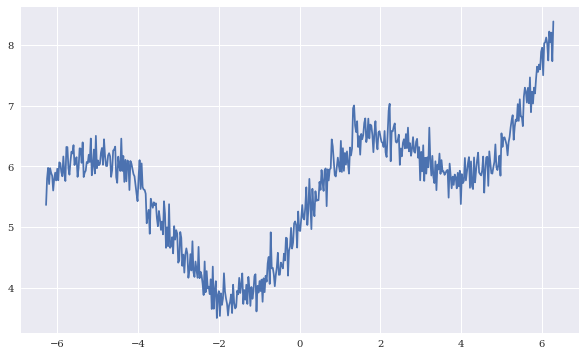

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(x, a);

In [272]:
a = a.reshape((len(a), -1))
a.shape

(500, 1)

In [273]:
a[:5]

array([[5.3673],
       [5.8002],
       [5.9768],
       [5.7102],
       [5.9715]])

In [274]:
lags = 5

In [275]:
g = TimeseriesGenerator(a, a, length=lags, batch_size=5)

In [276]:
model = Sequential()

model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [277]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 500)               251000    
                                                                 
 dense_16 (Dense)            (None, 1)                 501       
                                                                 
Total params: 251,501
Trainable params: 251,501
Non-trainable params: 0
_________________________________________________________________


In [278]:
# (1+1)*500 +500*500 = 251000
#(500+1)*1 = 501

In [279]:
%%time
model.fit(g, epochs=500,
          steps_per_epoch=10,
          verbose=False)

CPU times: user 1min 14s, sys: 6.35 s, total: 1min 20s
Wall time: 1min 7s


In [280]:
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
d = transform(x)

In [281]:
g_ = TimeseriesGenerator(d, d, length=lags, batch_size=len(d))

In [282]:
len(list(g_))
list(g_)

[(array([[19.1706, 19.4008, 19.2016, 18.8897, 19.2257],
         [19.4008, 19.2016, 18.8897, 19.2257, 18.5908],
         [19.2016, 18.8897, 19.2257, 18.5908, 19.6125],
         ...,
         [25.7457, 26.0779, 25.9117, 25.9159, 26.1981],
         [26.0779, 25.9117, 25.9159, 26.1981, 26.3752],
         [25.9117, 25.9159, 26.1981, 26.3752, 26.5049]]),
  array([18.5908, 19.6125, 19.43  , 18.9547, 18.5864, 18.7631, 18.8504,
         18.7521, 18.7945, 18.837 , 18.4949, 18.5906, 18.5169, 18.545 ,
         18.6086, 18.0556, 18.4269, 18.7201, 18.2545, 18.1107, 18.1251,
         18.3644, 17.824 , 18.1864, 17.4579, 18.3619, 17.9994, 18.2414,
         17.8104, 17.9298, 18.3062, 17.5739, 17.9135, 17.2283, 17.1018,
         17.7018, 17.5161, 17.3508, 17.3896, 17.2279, 17.3306, 17.3622,
         17.3413, 17.0821, 17.1762, 17.0822, 16.9544, 16.7037, 16.1843,
         16.6239, 16.5421, 16.1941, 16.5969, 16.3646, 16.0147, 16.3789,
         16.2843, 16.2809, 15.731 , 15.9894, 15.6302, 15.1399, 15.5246,


In [283]:
list(g_)[0][0].shape # first [0] is batch one
                     # second [0] is x

(995, 5)

In [284]:
f = list(g_)[0][0].reshape((len(d) - lags, lags, 1))
f

array([[[19.1706],
        [19.4008],
        [19.2016],
        [18.8897],
        [19.2257]],

       [[19.4008],
        [19.2016],
        [18.8897],
        [19.2257],
        [18.5908]],

       [[19.2016],
        [18.8897],
        [19.2257],
        [18.5908],
        [19.6125]],

       ...,

       [[25.7457],
        [26.0779],
        [25.9117],
        [25.9159],
        [26.1981]],

       [[26.0779],
        [25.9117],
        [25.9159],
        [26.1981],
        [26.3752]],

       [[25.9117],
        [25.9159],
        [26.1981],
        [26.3752],
        [26.5049]]])

In [285]:
y = model.predict(f, verbose=False)

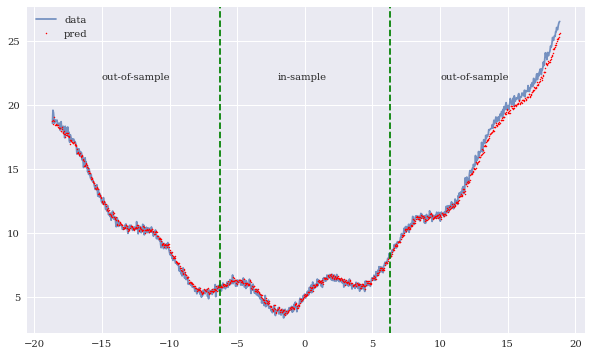

In [286]:
plt.figure(figsize=(10, 6))

plt.plot(x[lags:], d[lags:], label='data', alpha=0.75)
plt.plot(x[lags:], y, 'r.', label='pred', ms=3)

plt.axvline(-2 * np.pi, c='g', ls='--')
plt.axvline(2 * np.pi, c='g', ls='--')

plt.text(-15, 22, 'out-of-sample')
plt.text(-2, 22, 'in-sample')
plt.text(10, 22, 'out-of-sample')
plt.legend();

In [287]:
d = d.reshape (len(d), -1)
g_ = TimeseriesGenerator(d, d, length = lags, batch_size = 5)
y_ = model.predict(g_,  verbose = False)

In [288]:
y_.shape

(995, 1)

In [289]:
(y != y_).sum()

12

## Financial Price Series

In [290]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [291]:
symbol = 'EUR_USD'

In [292]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [293]:
def generate_data():
    data = pd.DataFrame(raw['CLOSE'])
    data.columns = [symbol]
    data = data.resample('30min', label='right').last().ffill()
    return data

In [294]:
data = generate_data()

In [295]:
data = (data - data.mean()) / data.std()

In [296]:
p = data[symbol].values

In [297]:
p = p.reshape((len(p), -1))

In [298]:
p.shape

(4415, 1)

In [299]:
lags = 5

In [300]:
g = TimeseriesGenerator(p, p, length=lags, batch_size=5)

In [301]:
def create_rnn_model(hu=100, lags=lags, layer='SimpleRNN',
                           features=1, algorithm='estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation='relu',
                            input_shape=(lags, features)))
    else:
        model.add(LSTM(hu, activation='relu',
                       input_shape=(lags, features)))
    if algorithm == 'estimation':
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    else:
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
    return model

In [302]:
model = create_rnn_model()

In [303]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

CPU times: user 29.3 s, sys: 1.24 s, total: 30.6 s
Wall time: 33.9 s


In [304]:
y = model.predict(g, verbose=False)

In [305]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()

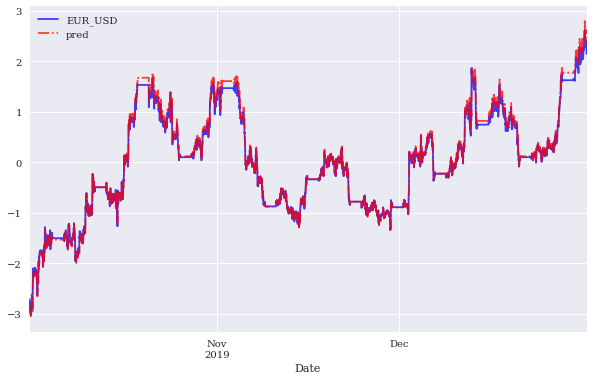

In [306]:
data[[symbol, 'pred']].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

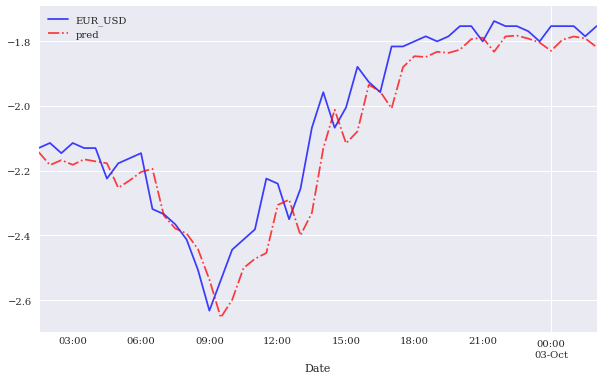

In [307]:
data[[symbol, 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

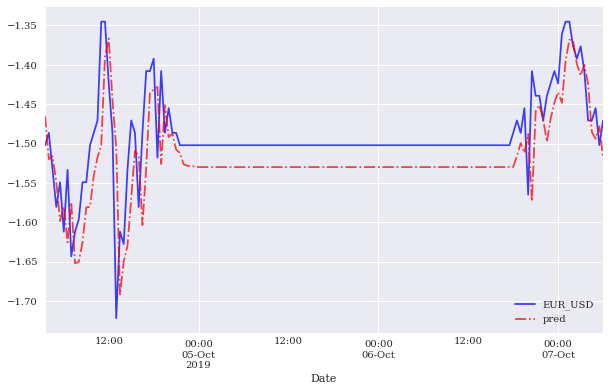

In [308]:
data[[symbol, 'pred']].iloc[150:300].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

## Financial Return Series 

In [309]:
data = generate_data()

In [310]:
data['r'] = np.log(data / data.shift(1))

In [311]:
data.dropna(inplace=True)

In [312]:
data = (data - data.mean()) / data.std()

In [313]:
r = data['r'].values

In [314]:
r = r.reshape((len(r), -1))

In [315]:
g = TimeseriesGenerator(r, r, length=lags, batch_size=5)

In [316]:
model = create_rnn_model()

In [317]:
%%time
model.fit(g, epochs=500, steps_per_epoch=10,
          verbose=False)

CPU times: user 28.5 s, sys: 1.29 s, total: 29.8 s
Wall time: 27.2 s


In [318]:
y = model.predict(g, verbose=False)

In [319]:
data['pred'] = np.nan
data['pred'].iloc[lags:] = y.flatten()
data.dropna(inplace=True)

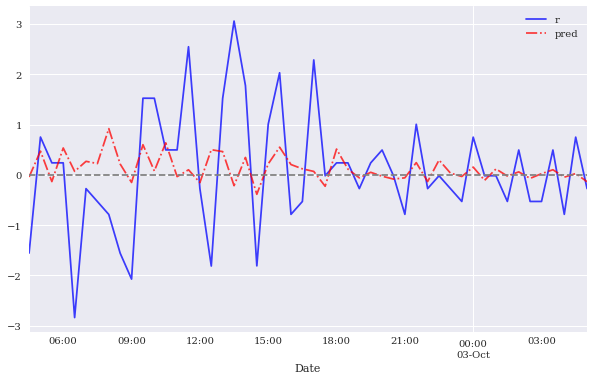

In [320]:
data[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--');

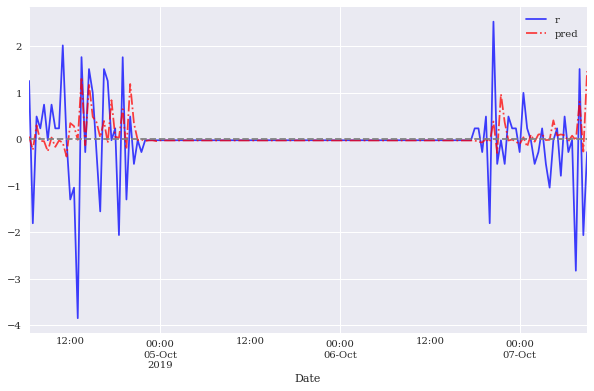

In [321]:
data[['r', 'pred']].iloc[150:300].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);
plt.axhline(0, c='grey', ls='--');

In [322]:
from sklearn.metrics import accuracy_score

In [323]:
accuracy_score(np.sign(data['r']), np.sign(data['pred']))

0.663642549330914

In [324]:
split = int(len(r) * 0.8)

In [325]:
train = r[:split]

In [326]:
test = r[split:]

In [327]:
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [328]:
set_seeds()
model = create_rnn_model(hu=100)

In [329]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10, verbose=False)

CPU times: user 6.67 s, sys: 288 ms, total: 6.96 s
Wall time: 7.97 s


In [330]:
g_ = TimeseriesGenerator(test, test, length=lags, batch_size=5)

In [331]:
y = model.predict(g_)

In [332]:
accuracy_score(np.sign(test[lags:]), np.sign(y))

0.6662870159453302

## Financial Features

In [333]:
data = generate_data()

In [334]:
data['r'] = np.log(data / data.shift(1))

In [335]:
window = 20
data['mom'] = data['r'].rolling(window).mean()
data['vol'] = data['r'].rolling(window).std()

In [336]:
data.dropna(inplace=True)

### Estimation

In [337]:
split = int(len(data) * 0.8)

In [338]:
train = data.iloc[:split].copy()

In [339]:
mu, std = train.mean(), train.std()

In [340]:
train = (train - mu) / std

In [341]:
test = data.iloc[split:].copy()

In [342]:
test = (test - mu) / std

In [343]:
g = TimeseriesGenerator(train.values, train['r'].values,
                        length=lags, batch_size=5)

In [344]:
set_seeds()
model = create_rnn_model(hu=100, features=len(data.columns),
                         layer='SimpleRNN')

In [345]:
%%time
model.fit(g, epochs=100, steps_per_epoch=10,
                verbose=False)

CPU times: user 6.16 s, sys: 298 ms, total: 6.46 s
Wall time: 6.67 s


In [346]:
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)

In [347]:
y = model.predict(g_).flatten()

In [348]:
accuracy_score(np.sign(test['r'].iloc[lags:]), np.sign(y))

0.6784897025171625

### Classification

In [349]:
set_seeds()
model = create_rnn_model(hu=50,
            features=len(data.columns),
            layer='LSTM',
            algorithm='classification')

In [350]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11000     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________


In [351]:
# Parameters of hidden layer
# (4 features +1) * (50 percentron/hidden unit) + (50 prior percentron/hidden unit * 50 hidden unit) = RNN estimate
#  LSTM Parameters = RNN estimator * 4 = 11000

# Parameters  of last layer
# 50 hidden unit + 1 =51

In [352]:
train_y = np.where(train['r'] > 0, 1, 0)

In [353]:
np.bincount(train_y)

array([2374, 1142])

In [354]:
def cw(a):
    c0, c1 = np.bincount(a)
    w0 = (1 / c0) * (len(a)) / 2
    w1 = (1 / c1) * (len(a)) / 2
    return {0: w0, 1: w1}

In [355]:
g = TimeseriesGenerator(train.values, train_y,
                        length=lags, batch_size=5)

In [356]:
%%time
model.fit(g, epochs=5, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: user 1.63 s, sys: 34.1 ms, total: 1.66 s
Wall time: 1.57 s


In [357]:
test_y = np.where(test['r'] > 0, 1, 0)

In [358]:
g_ = TimeseriesGenerator(test.values, test_y,
                         length=lags, batch_size=5)

In [359]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

In [360]:
np.bincount(y)

array([874])

In [361]:
accuracy_score(test_y[lags:], y)

0.6864988558352403

### Deep RNNs

In [364]:
from keras.layers import Dropout

In [366]:
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=1,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: 
        hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                     return_sequences=True,
                    ))
    if dropout:
        model.add(Dropout(rate, seed=seed))

    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))
            
    model.add(layer(hu))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [369]:
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='SimpleRNN',
            features=len(data.columns),
            dropout=True, 
            rate=0.3)

In [368]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_22 (SimpleRNN)   (None, 5, 50)             2750      
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,851
Trainable params: 7,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Layer 1
# DNN + RNN specific
# (4 features + 1) * (50 procentra) + (50 * 50) = 2750

In [ ]:
# Layer 2
# (50 hidden unit +1)* 50 +  (50 hidden unit * 50 hidden unit) = 5050

In [ ]:
# Final Layer
# (50 hidden unit + 1)*1 = 51

In [370]:
%%time
model.fit(g, epochs=200, steps_per_epoch=10,
          verbose=False, class_weight=cw(train_y))

CPU times: user 18.7 s, sys: 547 ms, total: 19.3 s
Wall time: 21.3 s


In [371]:
y = np.where(model.predict(g_, batch_size=None) > 0.5,
             1, 0).flatten()

In [372]:
np.bincount(y)

array([358, 516])

In [374]:
accuracy_score(test_y[lags:], y)

0.562929061784897